# Análise Exploratória
- O principal passo de um projeto de Ciência de Dados, bem antes de usar modelos de Aprendizado de Máquinas, é **entender os seus dados**!
- Vou ilustrar essa prática com a base de dados: **Titanic**.
- https://www.kaggle.com/competitions/titanic/data

# Titanic
As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

A base já foi dividida entre treino e teste. O objetivo da base é entender que tipos de pessoas teriam mais chance de sobreviver. Contudo, nesse primeiro momento, vou trabalhar apenas **Análise exploratória de dados**.

## Importar e visualizar base

In [1]:
import pandas as pd
base = pd.read_csv("train.csv")

In [2]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
base.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
base.shape

(891, 12)

* Perguntas iniciais:
    * Por que será que há cabines NAN? Será porque a passagem foi comprada por outra pessoa (ou responsável)?
    * Será que a cabine é organizada por posição e há algumas específicas mais pertos dos botes que pode colaborar para a pessoa sobreviver?
    * Será que o preço do ticket importa na sobrevevivência?

* Afirmação: Dificilmente nome e ID do usuário importa para a análise. Então, vou excluir essas colunas quando for treinar o modelo.

## Informações da base

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Observações:
    * Pouquíssimas cabines não nulas.
    * Há entradas nulas em embarque e idade.
        * Por que há entradas nulas em idade? Serão bebês, crianças?
    * No momento de desenvolver o modelo será interessante trocar o tipo de dados dos portos de embarque por 1, 2 e 3.

In [7]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Observações:
    * O valor máximo de preço do ticket é **bem** discrepante da maioria (3º quartil). Será que havia uma cabine muito especial? Será que foi um erro?
        * Para entender melhor, uma estratégia é visualizar quantos valores discrepantes existem.
    * Há valor zero no ticket. Isso faz sentido? Será da tripulação ou alguém muito jovem (como bebê) que não paga?

## Cardinalidade da base
* Se tivermos muitos valores distintos numa coluna, talvez ela não seja boa para o modelo.

In [15]:
base.nunique().sort_values(ascending=False)
# Visualização em ordem decrescente para saber a diferença de valores únicos de cada coluna

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Embarked         3
Pclass           3
Survived         2
Sex              2
dtype: int64

* Alguns vão aparecer com o mesmo ticket (681 únicos para 891 dados)
* Observação:
    * Para diminuir a cardinalidade do meu modelo (complexidade) talvez faça sentido agrupar valores de ticket e idade por grupos. Para ter certeza se é interessante, melhor olhar **histograma**.

In [16]:
import matplotlib.pyplot as plt

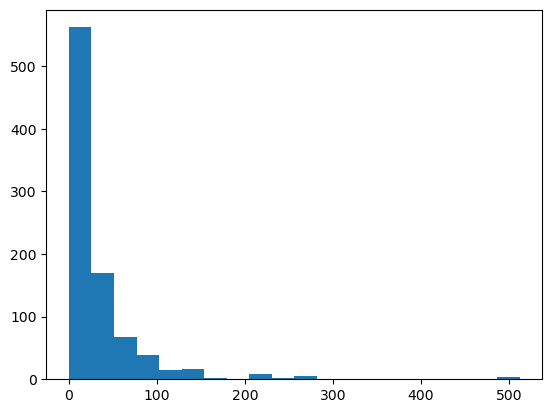

In [18]:
# Histograma das tarifas
fig, ax = plt.subplots()
ax.hist(base.Fare, bins=20)
## bins = 20: vai dividir o histograma num numero de intervalos iguais (no caso 20 iguais)
plt.show()

* Parece que a imensa maioria das tarifas são menores do que 100.
* Existe um (ou poucos) isolados em 500 de tarifa

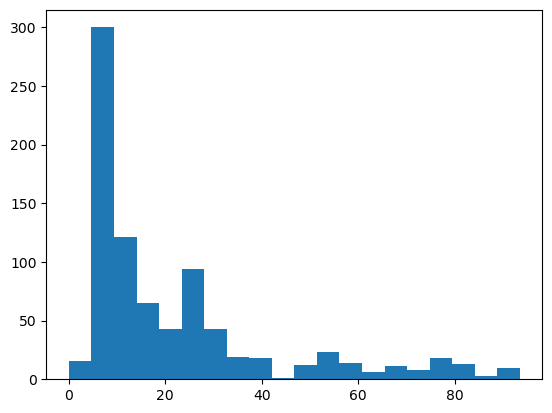

In [19]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
fig, ax = plt.subplots()

ax.hist(base[base.Fare <100].Fare, bins=20)

plt.show()

## Boxplot (estudo da dispersão dos dados)

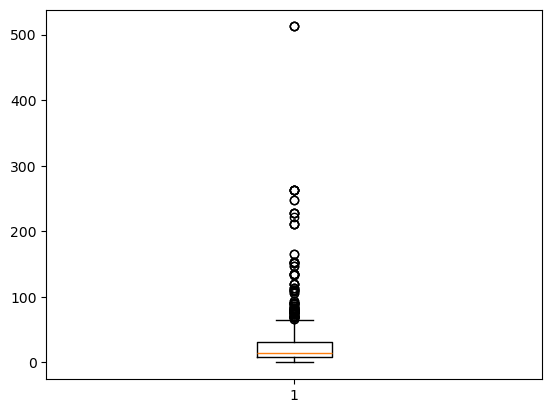

In [20]:
# Verificando para a coluna Fare
fig, ax = plt.subplots()

ax.boxplot(base.Fare)

plt.show()

Pelo **Boxplot** das tarifas 75% e o "máximo" delas possuem valores relativamente menores que 100. Vamos olhar esses valores:

In [22]:
base.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

* De fato, pela dispersão, 75% das tarifas são menores que 31.0
* Vamos determinar o valor "máximo" do boxplot:

In [24]:
Q1 = base.Fare.describe()["25%"] #1º quartil
Q3 = base.Fare.describe()["75%"] #3º quartil
interquartil = Q3 - Q1

valor_max_boxplot = Q3 + 1.5*interquartil
print(valor_max_boxplot)

65.6344


In [25]:
# Filtrando valores acima do máximo
base[base.Fare > valor_max_boxplot]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [29]:
#Dúvida: Quantos desse grupo sobreviveram?
base[base.Fare > valor_max_boxplot]["Survived"].sum()

np.int64(79)

In [30]:
79/116

0.6810344827586207

* Nesse grupo de pessoas que pagaram acima de 65.63 (nossos outliers de tarifas) sobreviveram 79 pessoas de 116 (68%)

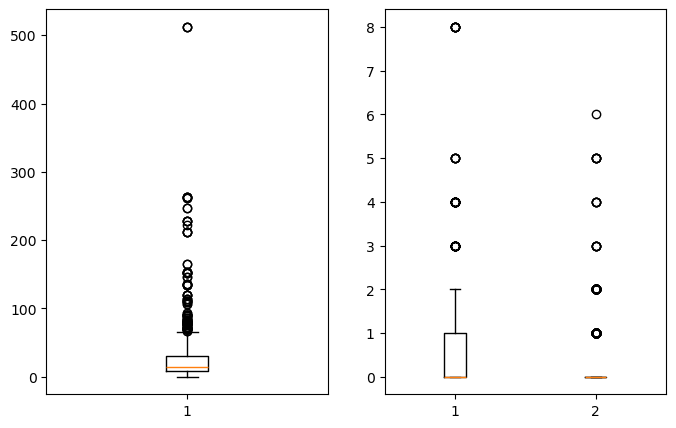

In [35]:
# Verificando para as colunas SibSp e Parch (Em boxplots separados)
    ## SibSp: número de irmãos / cônjuges a bordo do Titanic
    ## Parch: número de pais / filhos a bordo do Titanic
fig, ax = plt.subplots(ncols=2,figsize=(8,5))

ax[0].boxplot(base.Fare)
ax[1].boxplot([base.SibSp,base.Parch])

plt.show()

## Gráfico de barras para as classes (Pclass)

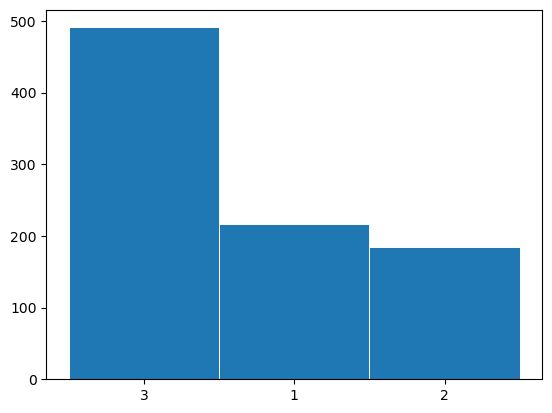

In [36]:
# Gerando um gráfico de barras
    ## Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
fig, ax = plt.subplots()

x=base.Pclass.value_counts().index.astype('str') #Com o astype str, ele nao vai colocar em ordem os indices
y=base.Pclass.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

## Usando KDE (Kernel Density Estimation) para estudar a relação de cada variável com a questão de sobrevivência

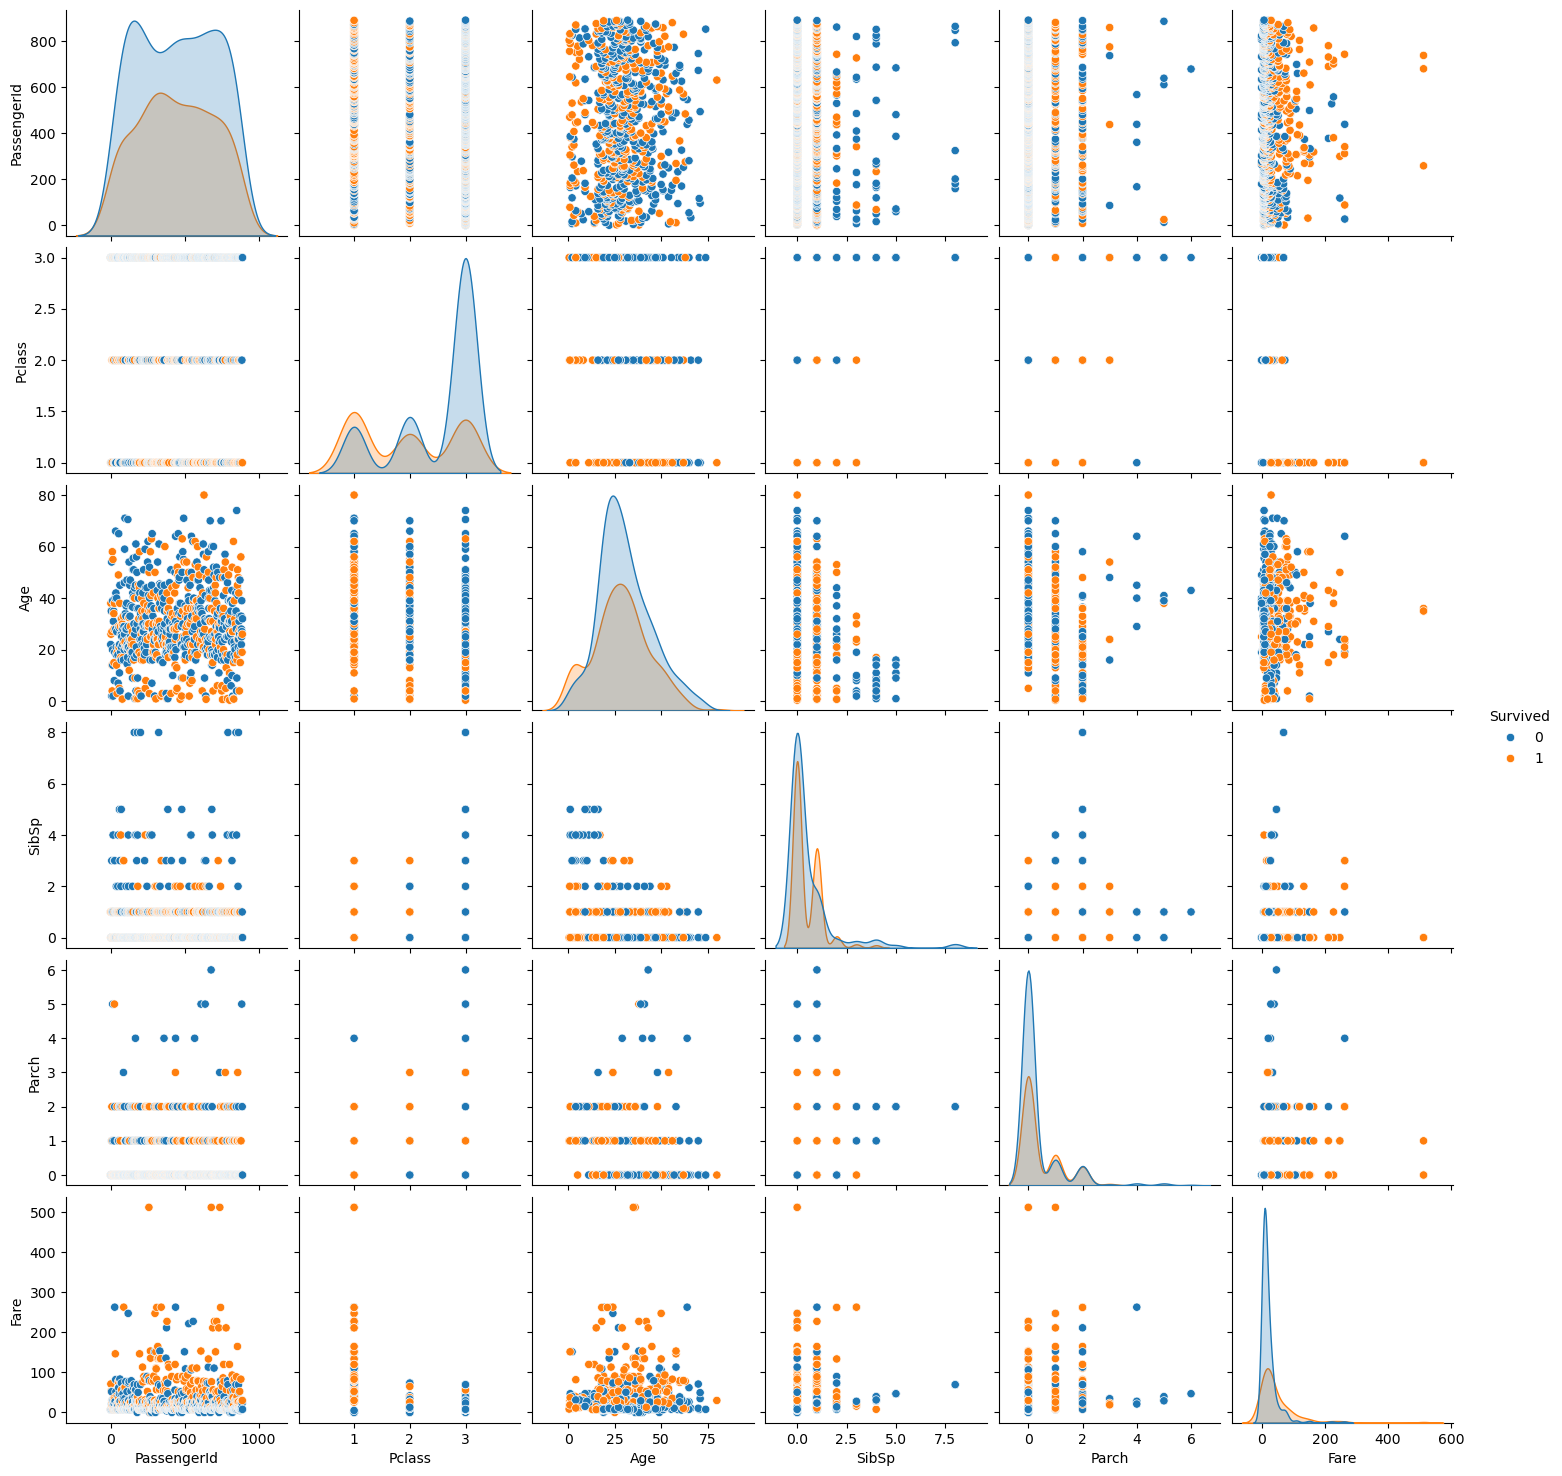

In [37]:
# Utilizando o seaborn
import seaborn as sns
sns.pairplot(base,hue="Survived")# ,diag_kind='hist')
plt.show()

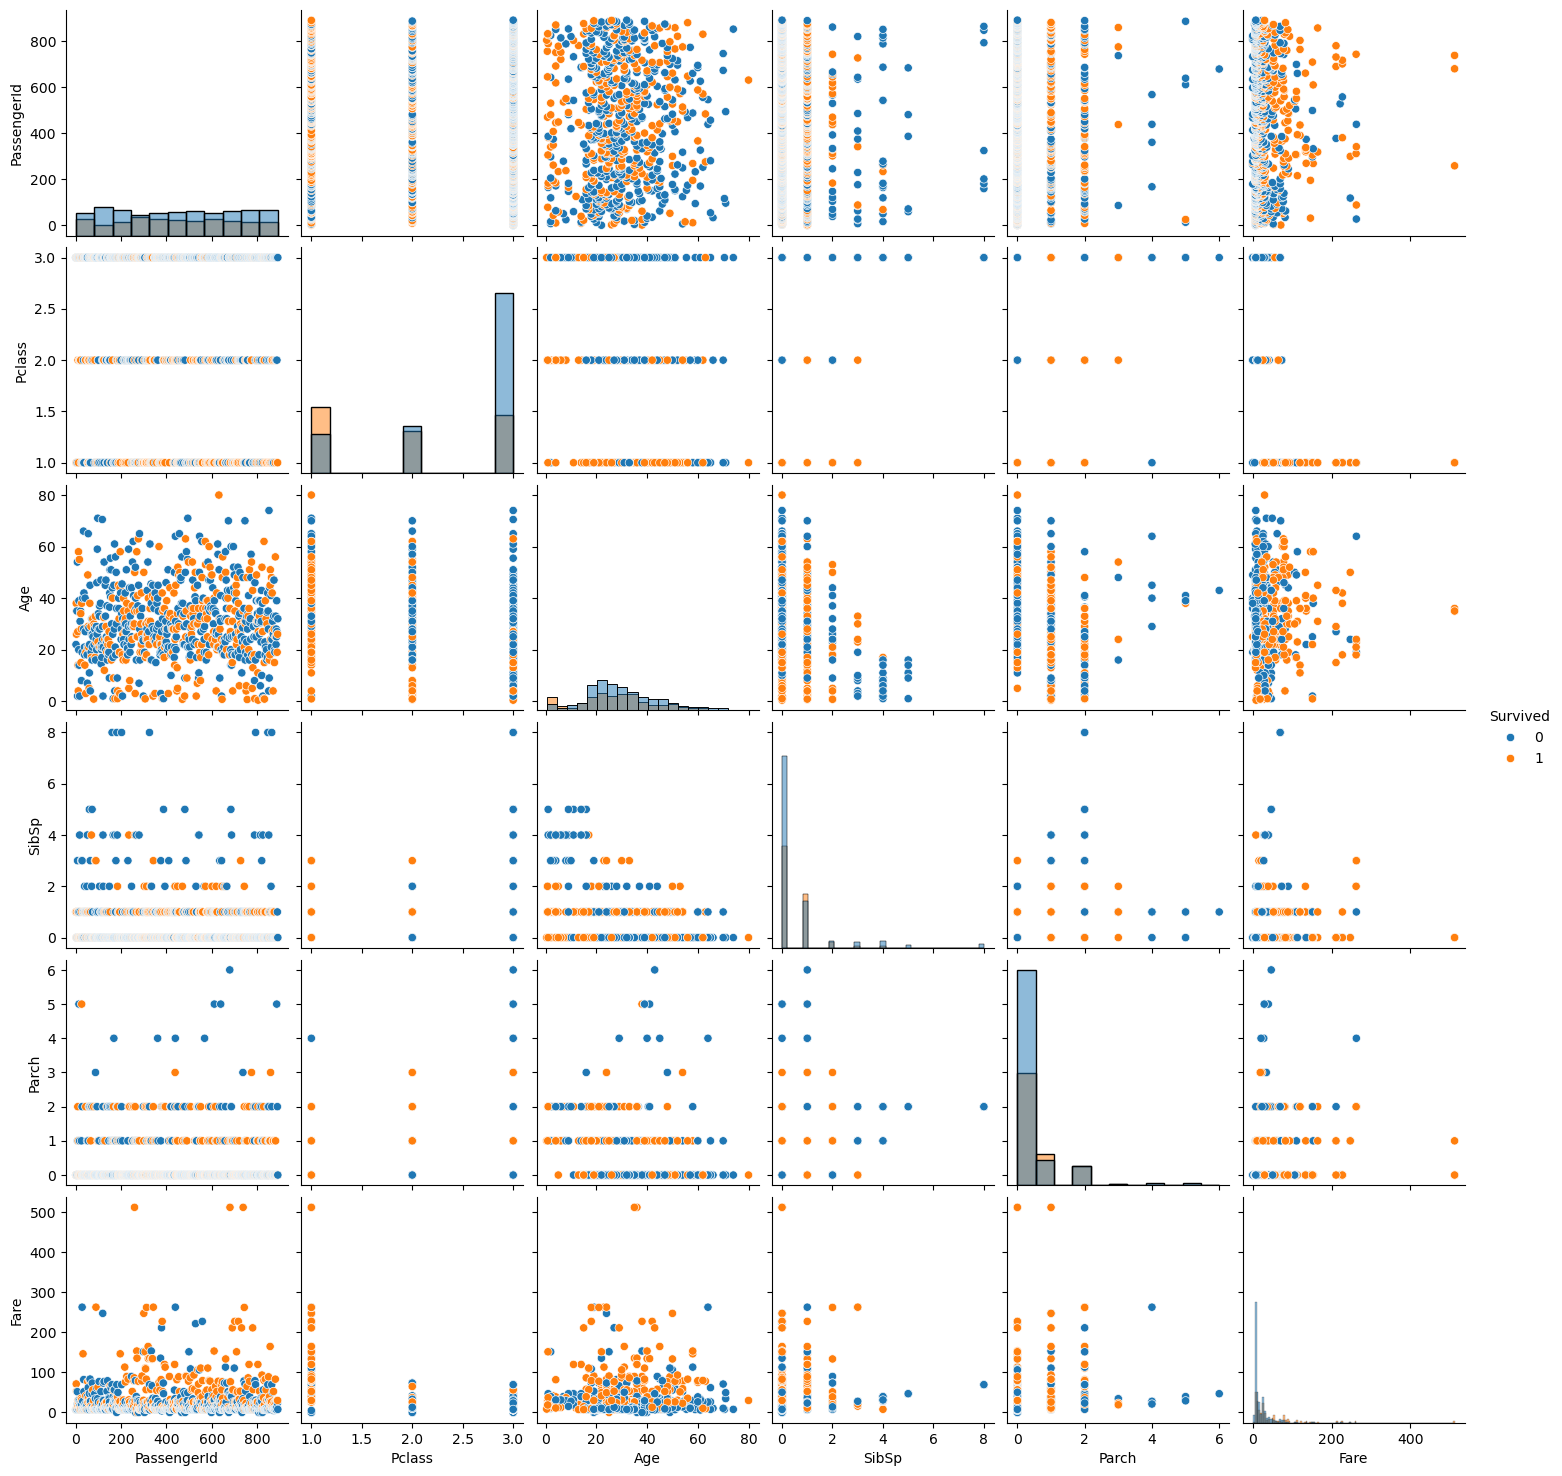

In [38]:
sns.pairplot(base,hue="Survived" ,diag_kind='hist')
plt.show()

Podemos olhar para alguma coluna que nos chama atenção e analisar separadamente

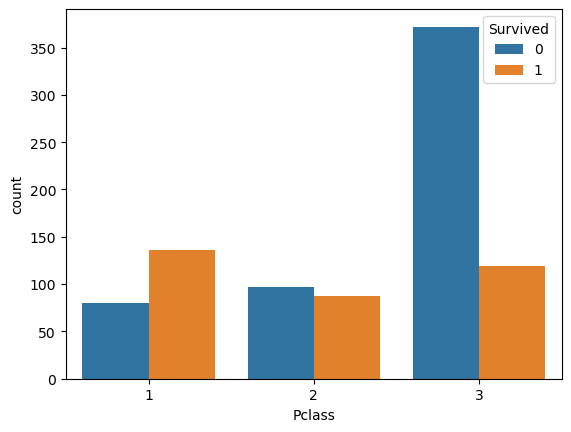

In [40]:
# Fazendo o kde para o Pclass
    ## Sendo Pclass categórica, vou usar countplot
sns.countplot(x='Pclass', hue='Survived', data=base)
plt.show()

* Pelo visto, passageiros de 3ª classe possuiam menos chance de sobrevivência.

## Correlação entre as variáveis

In [42]:
# Verificando a correlação entre os dados
base.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


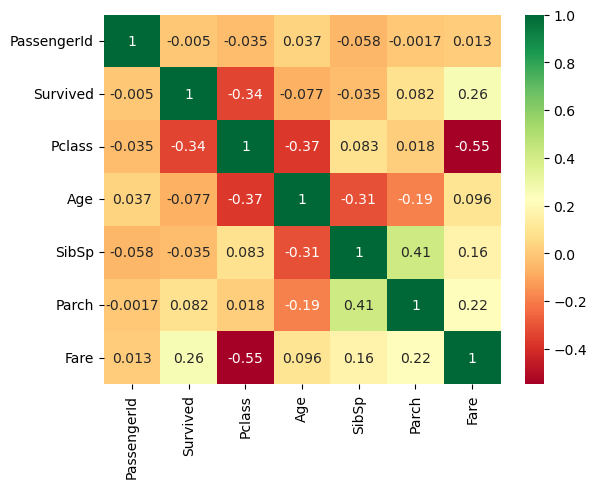

In [43]:
sns.heatmap(base.corr(numeric_only=True),annot=True,cmap='RdYlGn')
plt.show()

## Após entender mais um pouco da base, vamos tratar valores nulos

In [44]:
#outliers coluna Fare
base[base.Fare > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


* Um indivíduo teve 3 cabines, isso faz sentido?
    * Após pesquisa, de fato faz

In [45]:
# Vendo quem pagou 0
base[base.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


* Vemos que é um grupo com muitas entradas NAN. Faz sentido alguém de 1ª classe pagar 0?
* Vamos tratar substituindo pela média

In [46]:
# Calculando a média
mean_Fare = base.Fare.mean()
# Substituindo esses valores
base.loc[base.Fare < 1,'Fare'] = mean_Fare
    ## Filtrei para substituir apenas a coluna de Fare
    ## Poderiamos fazer a substituição também por classe, vendo a tarifa média de cada classe.

In [47]:
# Idade nulas

base[base.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [48]:
# Entendendo melhor os valores
base.loc[base.Age.isnull(),'Survived'].value_counts()
### Qual a concentração desses valores nulos por sexo, classe e sobrevivente?


Survived
0    125
1     52
Name: count, dtype: int64

In [49]:
# Substituindo os valores nulos por essa média
base.loc[base.Age.isnull(),'Age'] = base.Age.mean()

In [51]:
# Verificando se esquecemos de algo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# Olhando valores nulos de embarque
base.loc[base.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Exploramos muitos itens e percebemos algumas possíveis relações interessantes entre as variáveis preditivas e nosso target (Survived)

Uma vez tratada e explorada nossa base, podemos aplicar nossa modelo.